In [1]:
#컴파일 간편화
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')
from tqdm import tqdm
#데이터 전처리
import numpy as np
import pandas as pd
#분석용 페키지 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold
#시각화 페키지
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap

In [2]:
wine_data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
wine_data.columns=['class_label', 'alchohol', 'malic_acid', 'ash', 
                    'alcalinity_of_ash', 'magnesium', 'total_phenols', 
                    'flavanoids', 'nonflavanoid_phenols', 
                    'proanthocyanins', 'color_intensity', 'hue', 
                    'OD280', 'proline']  # Column names
print('class_label:', np.unique(wine_data['class_label']))
wine_data.head()

class_label: [1 2 3]


,class_label,alchohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_data

,class_label,alchohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine_data.shape

(178, 14)

In [5]:
wine_alchohol=wine_data.alchohol

In [6]:
wine_alchohol

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alchohol, Length: 178, dtype: float64

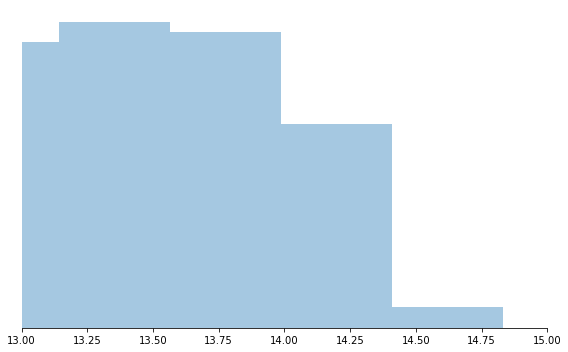

In [7]:
plt.figure(figsize=(8,5))
sns.distplot(wine_alchohol, kde=False)

sns.despine(left=True)
plt.xlim(13,15)
plt.xlabel('')
plt.yticks([])
plt.tight_layout()

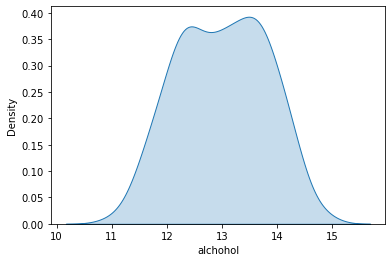

In [8]:
sns.kdeplot(wine_alchohol, shade=True);

In [9]:
wine_malic_acid=wine_data.iloc[:,2]

In [10]:
wine_malic_acid

0      1.71
1      1.78
2      2.36
3      1.95
4      2.59
       ... 
173    5.65
174    3.91
175    4.28
176    2.59
177    4.10
Name: malic_acid, Length: 178, dtype: float64

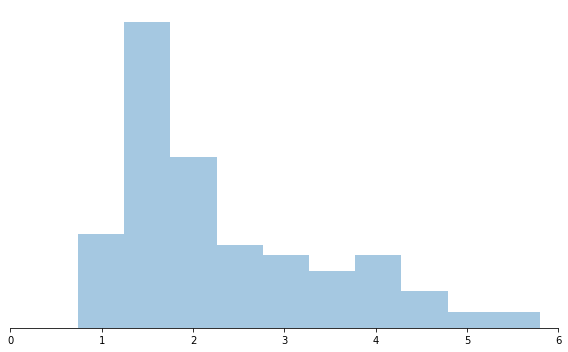

In [11]:
plt.figure(figsize=(8,5))
sns.distplot(wine_malic_acid, kde=False)

sns.despine(left=True)
plt.xlim(0,6)
plt.xlabel('')
plt.yticks([])
plt.tight_layout()

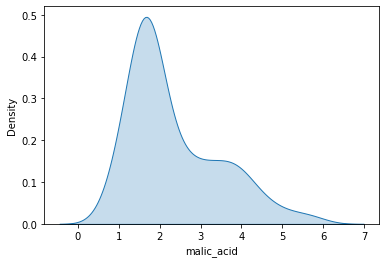

In [12]:
sns.kdeplot(wine_malic_acid, shade=True);

In [13]:
wine_data.describe()

,class_label,alchohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [14]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   alchohol              178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [15]:
X=pd.DataFrame(wine_data.drop('class_label',axis=1))
Y=pd.DataFrame(wine_data.class_label)

In [16]:
X.head()

,alchohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
Y.head()

,class_label
0,1
1,1
2,1
3,1
4,1


In [18]:
Y['class_label'].value_counts()

2    71
1    59
3    48
Name: class_label, dtype: int64

In [19]:
#train set & test set 분리(stratify=지나치게 편향된 추출을 방지)
x_train, x_test, y_train, y_test = train_test_split(X,Y,stratify=Y,test_size=0.20,random_state=2021)
#set x 의 정규화
normalizer = StandardScaler()
x_train=normalizer.fit_transform(x_train)
x_test= normalizer.transform(x_test)

print(f'Train set dimension is {x_train.shape}')
print(f'Test set dimension is {x_test.shape}')

Train set dimension is (142, 13)
Test set dimension is (36, 13)


In [ ]:
# k에 따른 결과
# K가 매우 작을 경우: 데이터의 지역적 특성을 지나치게 반영(overfitting)
# K가 매우 클 경우: 다른 범주의 개체를 너무 많이 포함하여 오분류할 위험이 높음(underfitting)

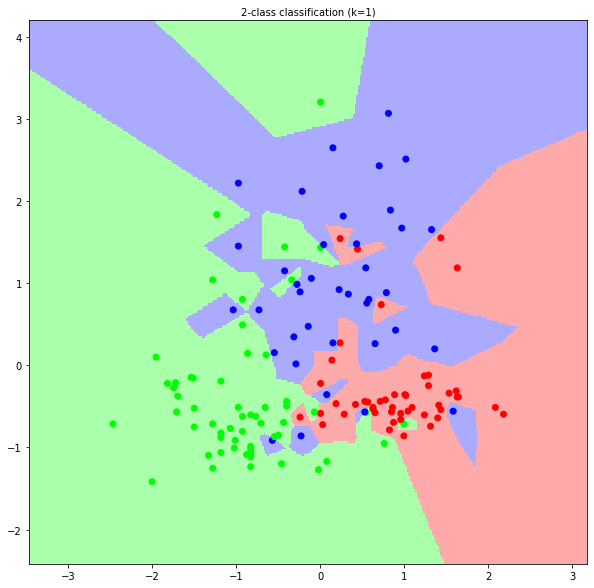

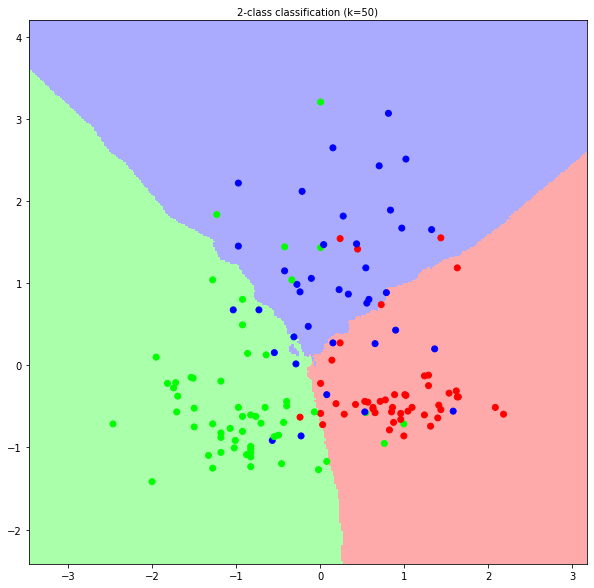

In [20]:
x_vis = x_train[:,:2]#임의로2개의 변수만을 이용
y_vis = y_train.values.ravel()

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for k in [1,50]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_vis, y_vis)
    
    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)
    
plt.show()

In [36]:
# cross validation을 통한 최적의 hyperparameter K 결정

k_list =[i for i in range(1,100)]
cv_scores=[]

for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors=k, p=2)
    # p=1: manhatten_distance, p=2: euclidean_distance, p=l_p:minkowski_distance
    
    scores= cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

100%|██████████| 99/99 [00:02<00:00, 43.84it/s]


In [22]:
cv_scores

[0.9442857142857143,
 0.93,
 0.9438095238095239,
 0.950952380952381,
 0.9580952380952382,
 0.950952380952381,
 0.9580952380952382,
 0.9652380952380952,
 0.950952380952381,
 0.9580952380952381,
 0.950952380952381,
 0.950952380952381,
 0.9580952380952381,
 0.9652380952380953,
 0.9723809523809523,
 0.9723809523809523,
 0.9723809523809523,
 0.9723809523809523,
 0.9790476190476192,
 0.971904761904762,
 0.9647619047619049,
 0.9652380952380953,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.9576190476190478,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.971904761904762,
 0.9647619047619047,
 0.9576190476190476,
 0.9576190476190476,
 0.950952380952381,
 0.9652380952380953,
 0.9652380952380953,
 0.9652380952380953,
 0.9580952380952381,
 0.9580952380952381,
 0.936666

In [23]:
best_k = [k_list[i] for i in range (len(cv_scores)) if cv_scores[i]==np.max(cv_scores)]
print('optimized k value :',best_k)

optimized k value : [19]


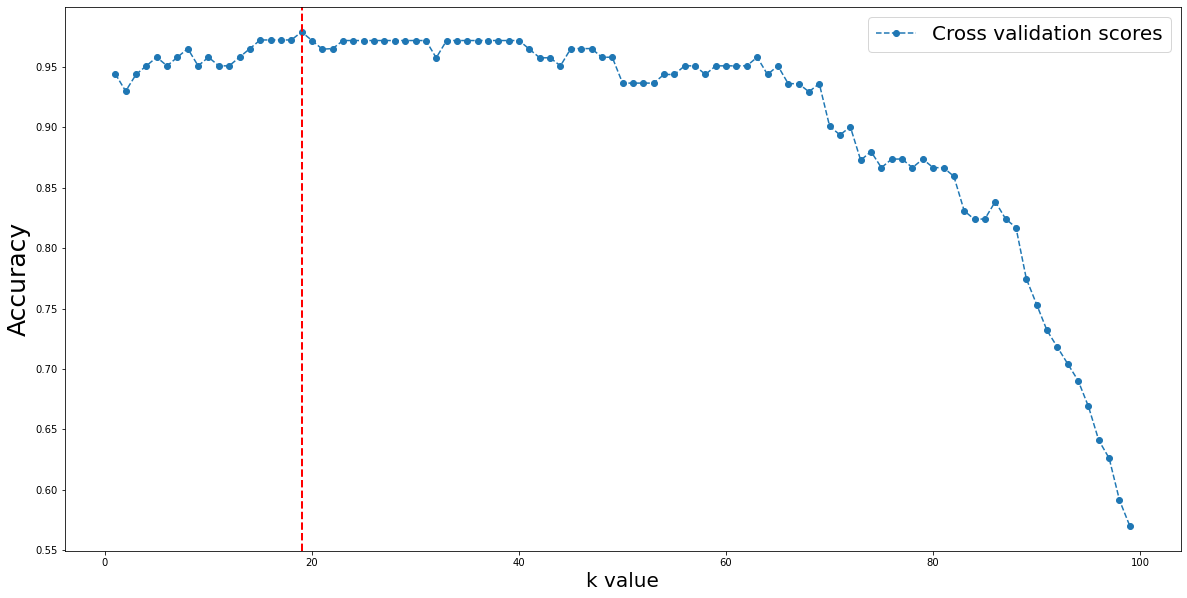

In [24]:
plt.figure(figsize=(20,10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.legend(['Cross validation scores'], fontsize=20)
plt.xlabel('k value', fontsize=20)
plt.ylabel('Accuracy', fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [37]:
#distance의 종류에 따른 최적의 k 값의 변화
k_list =[i for i in range(1,100)]

euc=[]
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors=k, p=2)
    # p=2: euclidean_distance,
    
    scores= cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    euc.append(scores.mean())

100%|██████████| 99/99 [00:02<00:00, 43.87it/s]


In [38]:
k_list =[i for i in range(1,100)]

man=[]
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors=k, p=1)
    # p=1: Manhattan_distance,
    
    scores= cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    man.append(scores.mean())

100%|██████████| 99/99 [00:02<00:00, 44.53it/s]


In [39]:
k_list =[i for i in range(1,100)]

mks=[]
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric = 'minkowski')
    # minkowski distance
    
    scores= cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    mks.append(scores.mean())

100%|██████████| 99/99 [00:02<00:00, 42.12it/s]


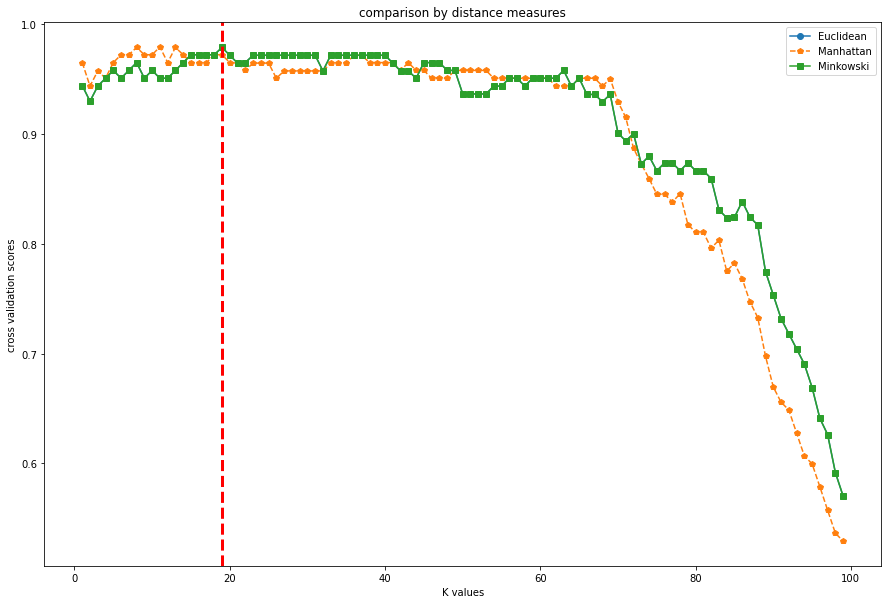

In [28]:
plt.figure(figsize=(15,10))
plt.plot(k_list, euc, marker='o')
plt.plot(k_list, man, linestyle='dashed', marker='p')
plt.plot(k_list, mks, marker='s')
plt.axvline(19, color='r', linestyle='--', linewidth=3)
plt.xlabel('K values')
plt.ylabel('cross validation scores')
plt.title('comparison by distance measures')
plt.legend(['Euclidean','Manhattan','Minkowski'])
plt.show()

In [29]:
classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(x_train, y_train)
print(classifier.score(x_test, y_test))

0.9722222222222222


100%|██████████| 99/99 [00:01<00:00, 50.89it/s]


optimized k value : [19]


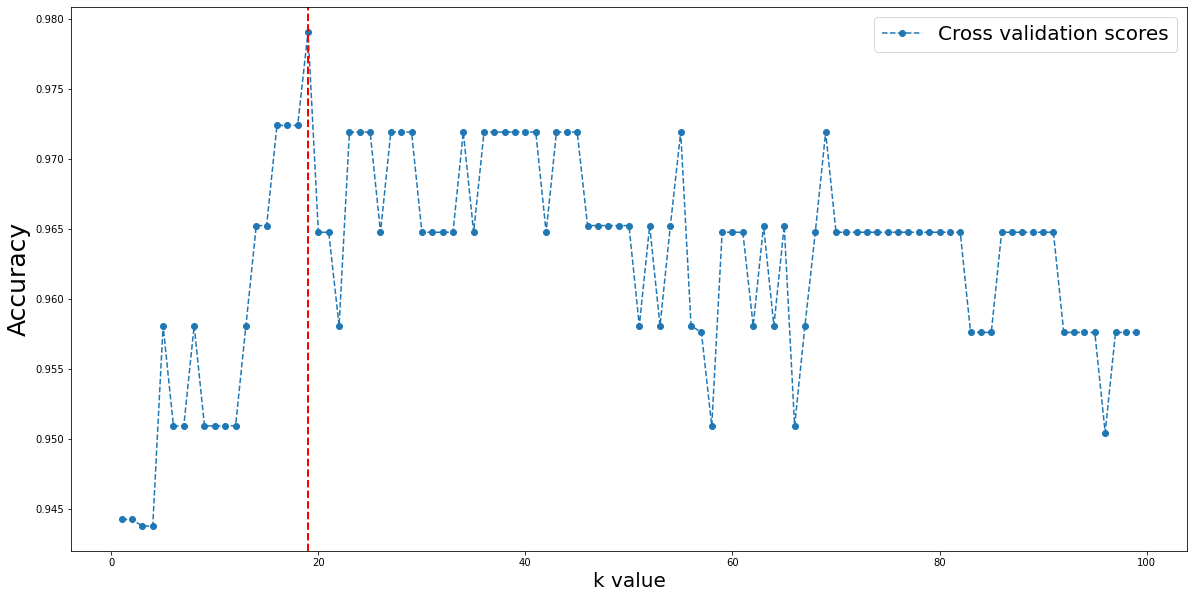

In [40]:
#Weighted KNN 적용확인
k_list =[i for i in range(1,100)]

euc=[]
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
    
    scores= cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    euc.append(scores.mean())
    
best_k = [k_list[i] for i in range (len(euc)) if euc[i]==np.max(euc)]
print('optimized k value :',best_k)

plt.figure(figsize=(20,10))
plt.plot(k_list, euc, marker='o', linestyle='dashed')
plt.legend(['Cross validation scores'], fontsize=20)
plt.xlabel('k value', fontsize=20)
plt.ylabel('Accuracy', fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [31]:
print(np.max(euc))

0.9790476190476192


100%|██████████| 99/99 [00:01<00:00, 56.55it/s]


optimized k value : [19]


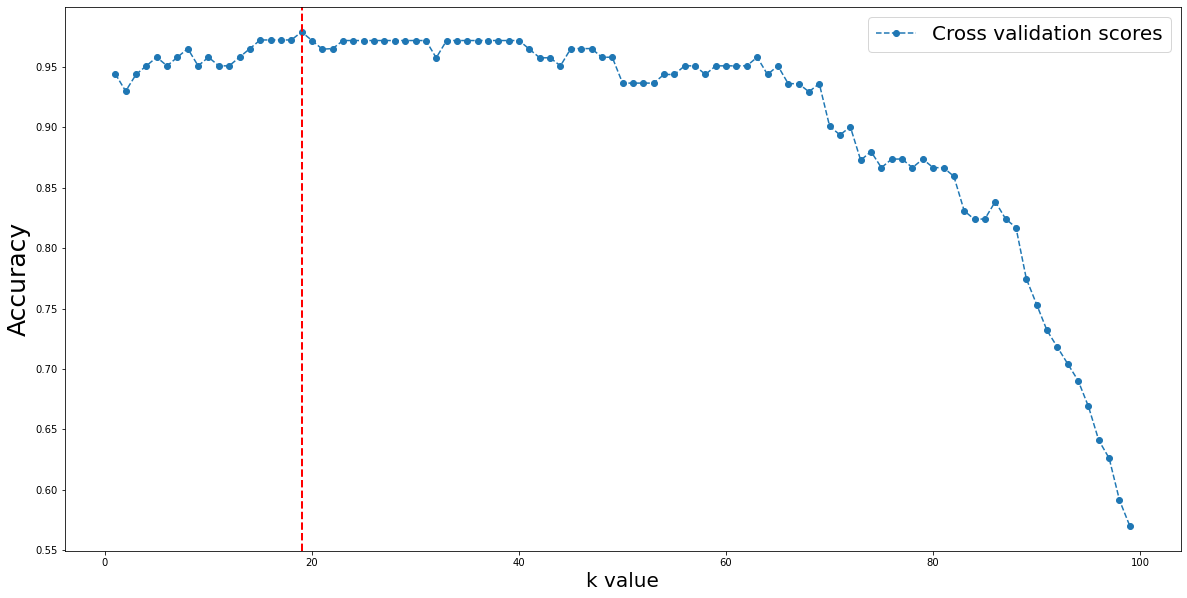

In [35]:
k_list =[i for i in range(1,100)]

euc=[]
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, weights='uniform')
    
    scores= cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    euc.append(scores.mean())
    
best_k = [k_list[i] for i in range (len(euc)) if euc[i]==np.max(euc)]
print('optimized k value :',best_k)

plt.figure(figsize=(20,10))
plt.plot(k_list, euc, marker='o', linestyle='dashed')
plt.legend(['Cross validation scores'], fontsize=20)
plt.xlabel('k value', fontsize=20)
plt.ylabel('Accuracy', fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()